In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load the model

In [2]:
model = tf.keras.models.load_model("model/dampe_cnn_final.keras")

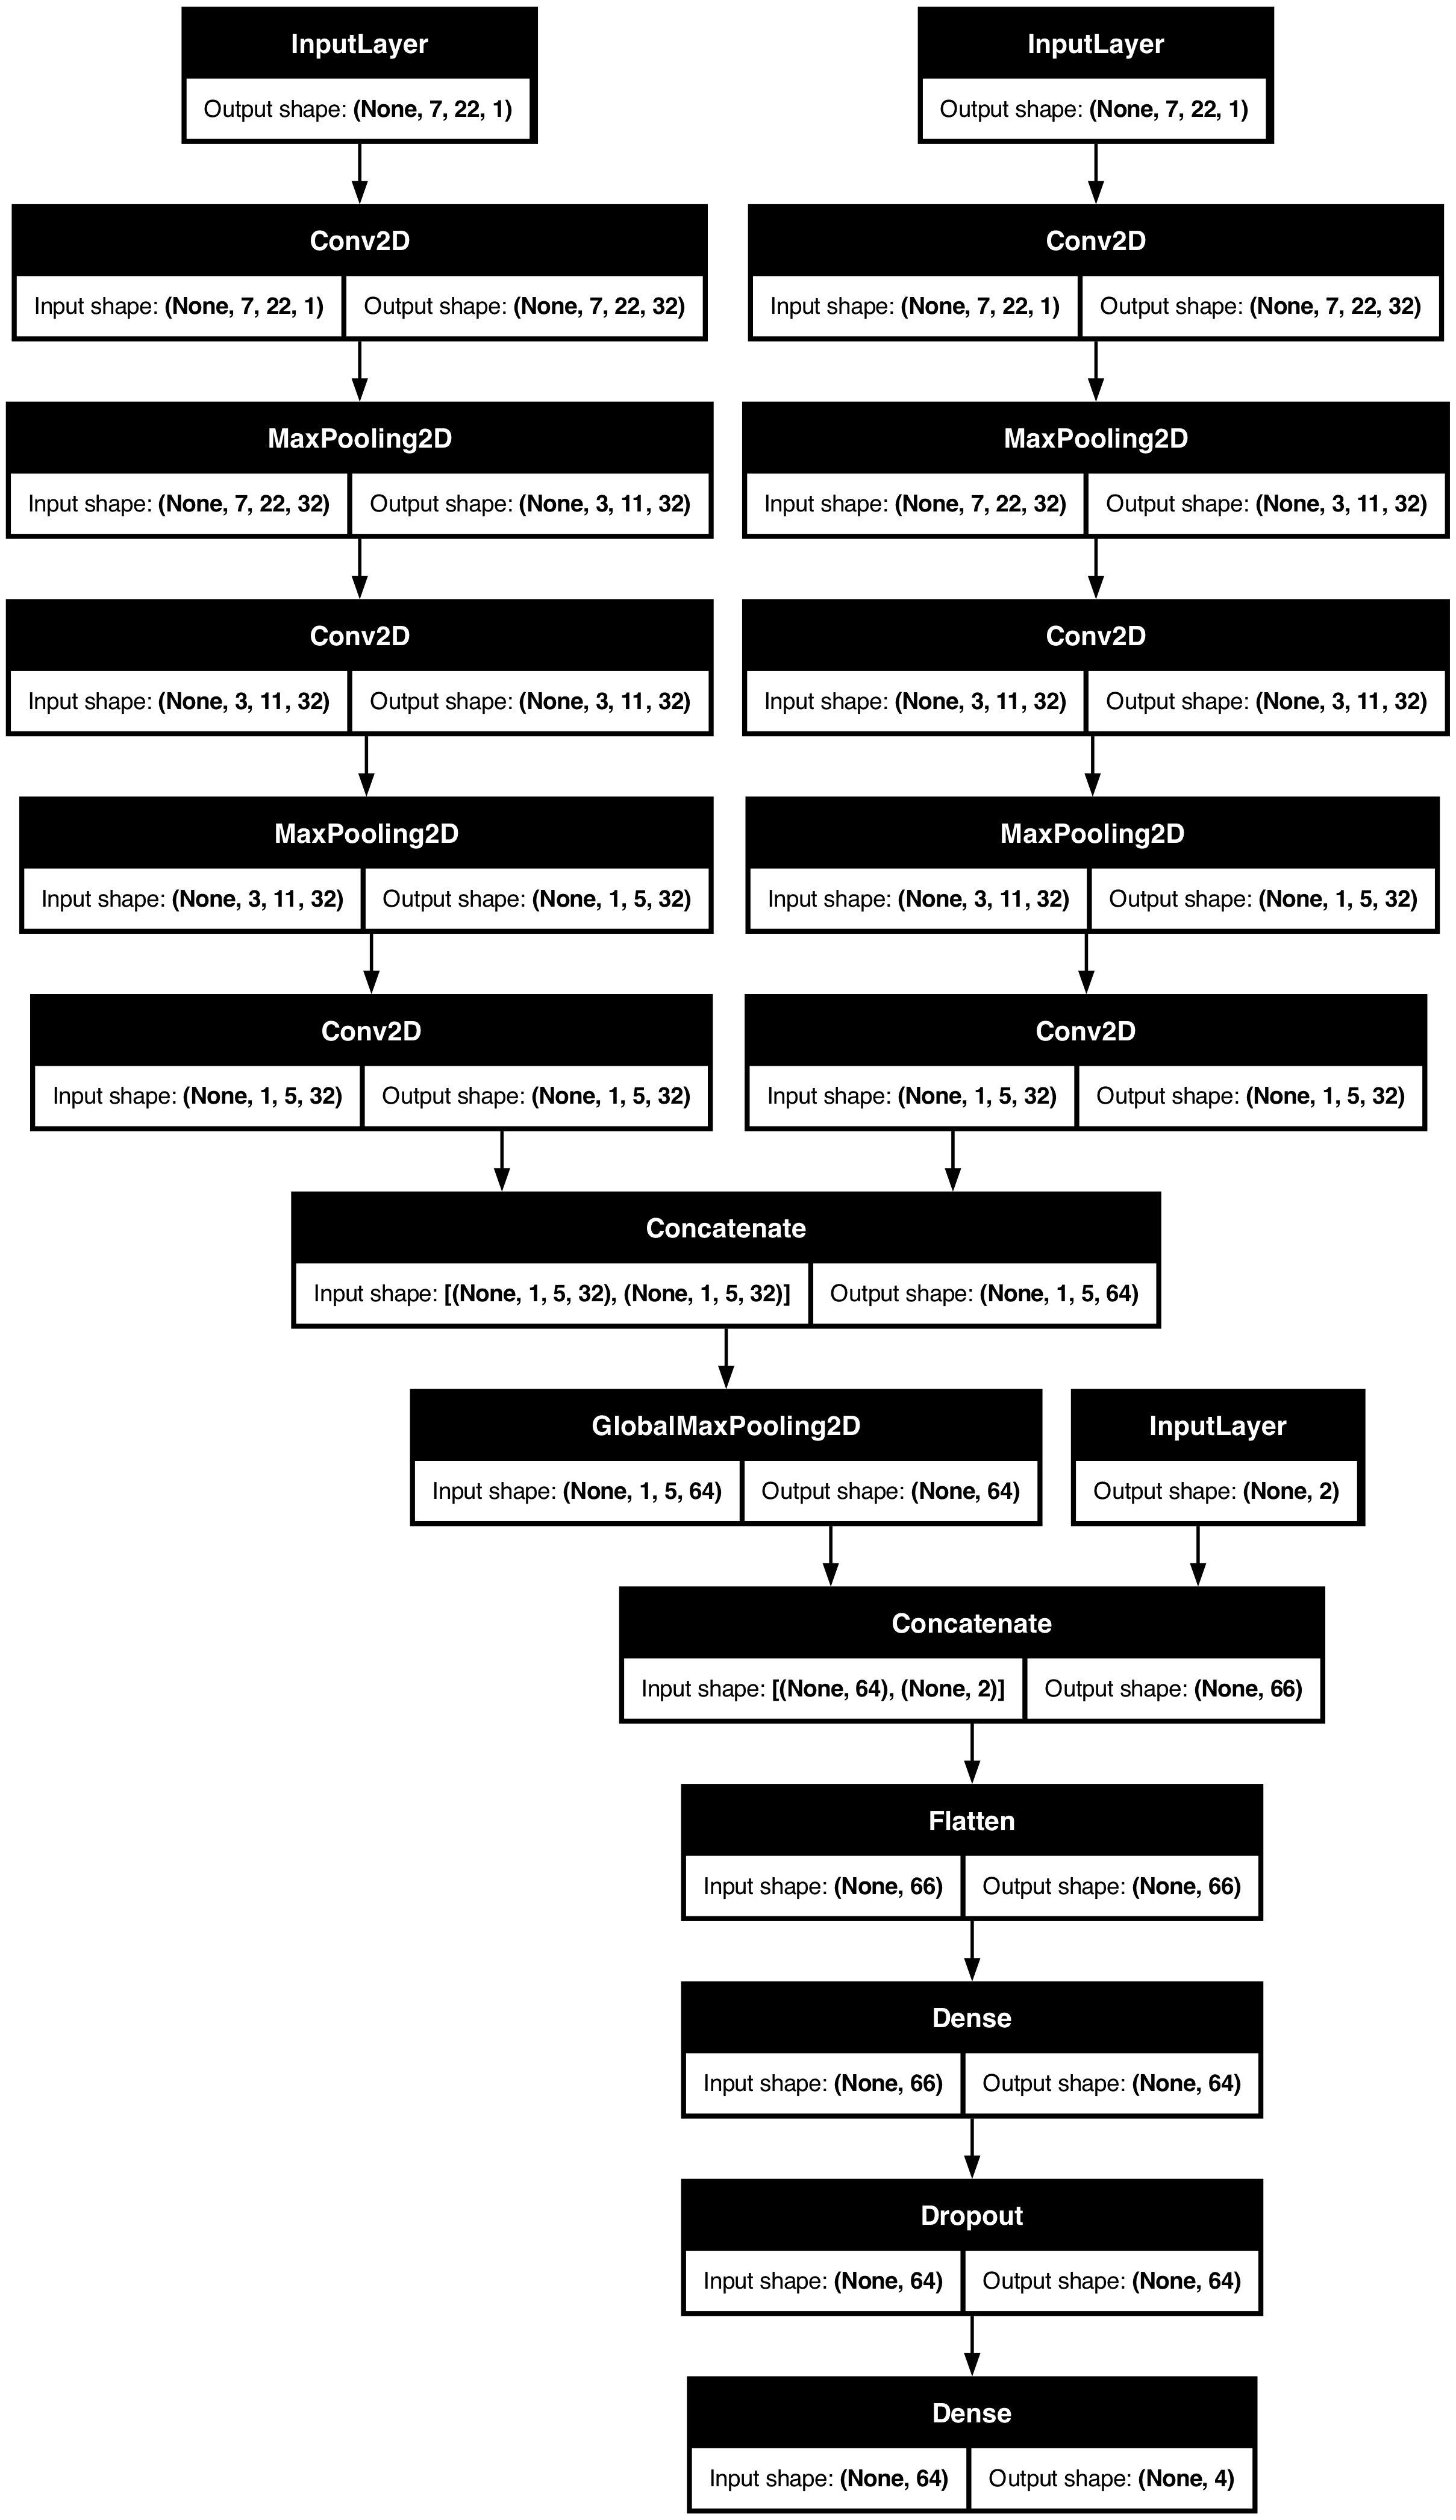

In [3]:
tf.keras.utils.plot_model(
    model, 
    to_file="model.png",
    show_shapes=True
)

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 7, 22, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 7, 22, 1)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 7, 22, 32) │        320 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 7, 22, 32) │        320 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 3, 11, 32) │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 3, 11, 32) │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 3, 11, 32) │      9,248 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 3, 11, 32) │      9,248 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 1, 5, 32)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 1, 5, 32)  │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 1, 5, 32)  │      9,248 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 1, 5, 32)  │      9,248 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1, 5, 64)  │          0 │ conv2d_2[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ concatenate[0][0] │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 66)        │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 66)        │          0 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,288 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 4)         │        260 │ dropout[0][0]   

 Total params: 84,362 (329.54 KB)

 Trainable params: 42,180 (164.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,182 (164.78 KB)

## Load the validation dataset

In [5]:
unzip_data = np.load("data/validation_data.npz")
calorimeter_images = unzip_data['arr_0']
calorimeter_energies = unzip_data['arr_1']
sum_pixels_layer = unzip_data['arr_2']
data_target = unzip_data['arr_3']

In [6]:
valid_fraction = 1.0
validation_size = int(valid_fraction * len(calorimeter_images))

In [7]:
calorimeter_images_valid = calorimeter_images[:validation_size]
calorimeter_energies_valid = calorimeter_energies[:validation_size]
sum_pixels_layer_valid = sum_pixels_layer[:validation_size]
data_target_valid = data_target[:validation_size]
# data_rec_valid = data_rec[:validation_size]

Plot the validation images (a few of them)

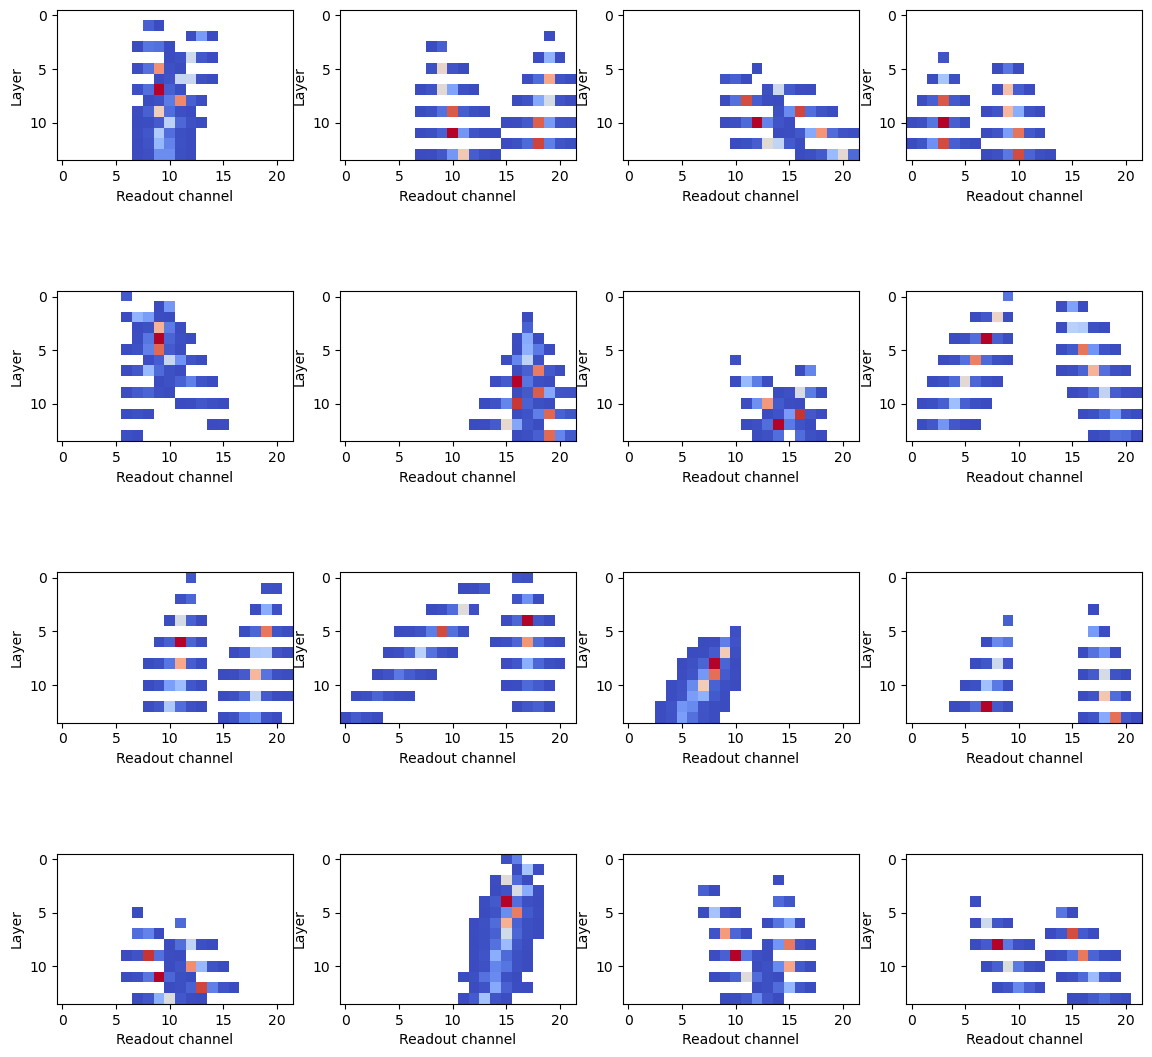

In [8]:
n_c = 4
n_r = 4
fig, ax = plt.subplots(n_c, n_r, figsize=(14, 14))
for i, ax in enumerate(fig.axes):
    # Here we make a copy so we can manipulate the array without changing it in calorimeter_images
    image = calorimeter_images_valid[i].copy()
    # Filling the zero values with NaNs will show us white space where there is zero deposits recorded.
    # Note that if we didn't have the copy there, this would insert NaNs into calorimeter_images.
    image[image == 0] = 'nan'
    ax.imshow(image, cmap="coolwarm")
    ax.set_xlabel("Readout channel")
    ax.set_ylabel("Layer")
plt.show()

In [9]:
energies_valid = np.concatenate((calorimeter_energies_valid, sum_pixels_layer_valid), axis=1)

## Perform the predictions

In [10]:
trial_x_images = calorimeter_images_valid[:,0:14:2,:,:]
trial_y_images = calorimeter_images_valid[:,1:15:2,:,:]

In [11]:
pred_coords = model.predict([trial_x_images, trial_y_images, calorimeter_energies_valid], batch_size=500)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [12]:
pred_coords *= 400.

In [13]:
data_target_valid *= 400.

## Evaluate the performance

### Plot the predicted-truth linearity

In [14]:
import plotting

/Users/devanshu/UniGe/dampe-cnn/plotting.py:158: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.85, 0.8, f"$\mu$ = {popt[1]:0.3f}",
/Users/devanshu/UniGe/dampe-cnn/plotting.py:161: SyntaxWarning: invalid escape sequence '\s'
  ax.text(0.85, 0.75, f"$\sigma$ = {popt[2]:0.3f}",


In [15]:
plotting.make_pretty_format()

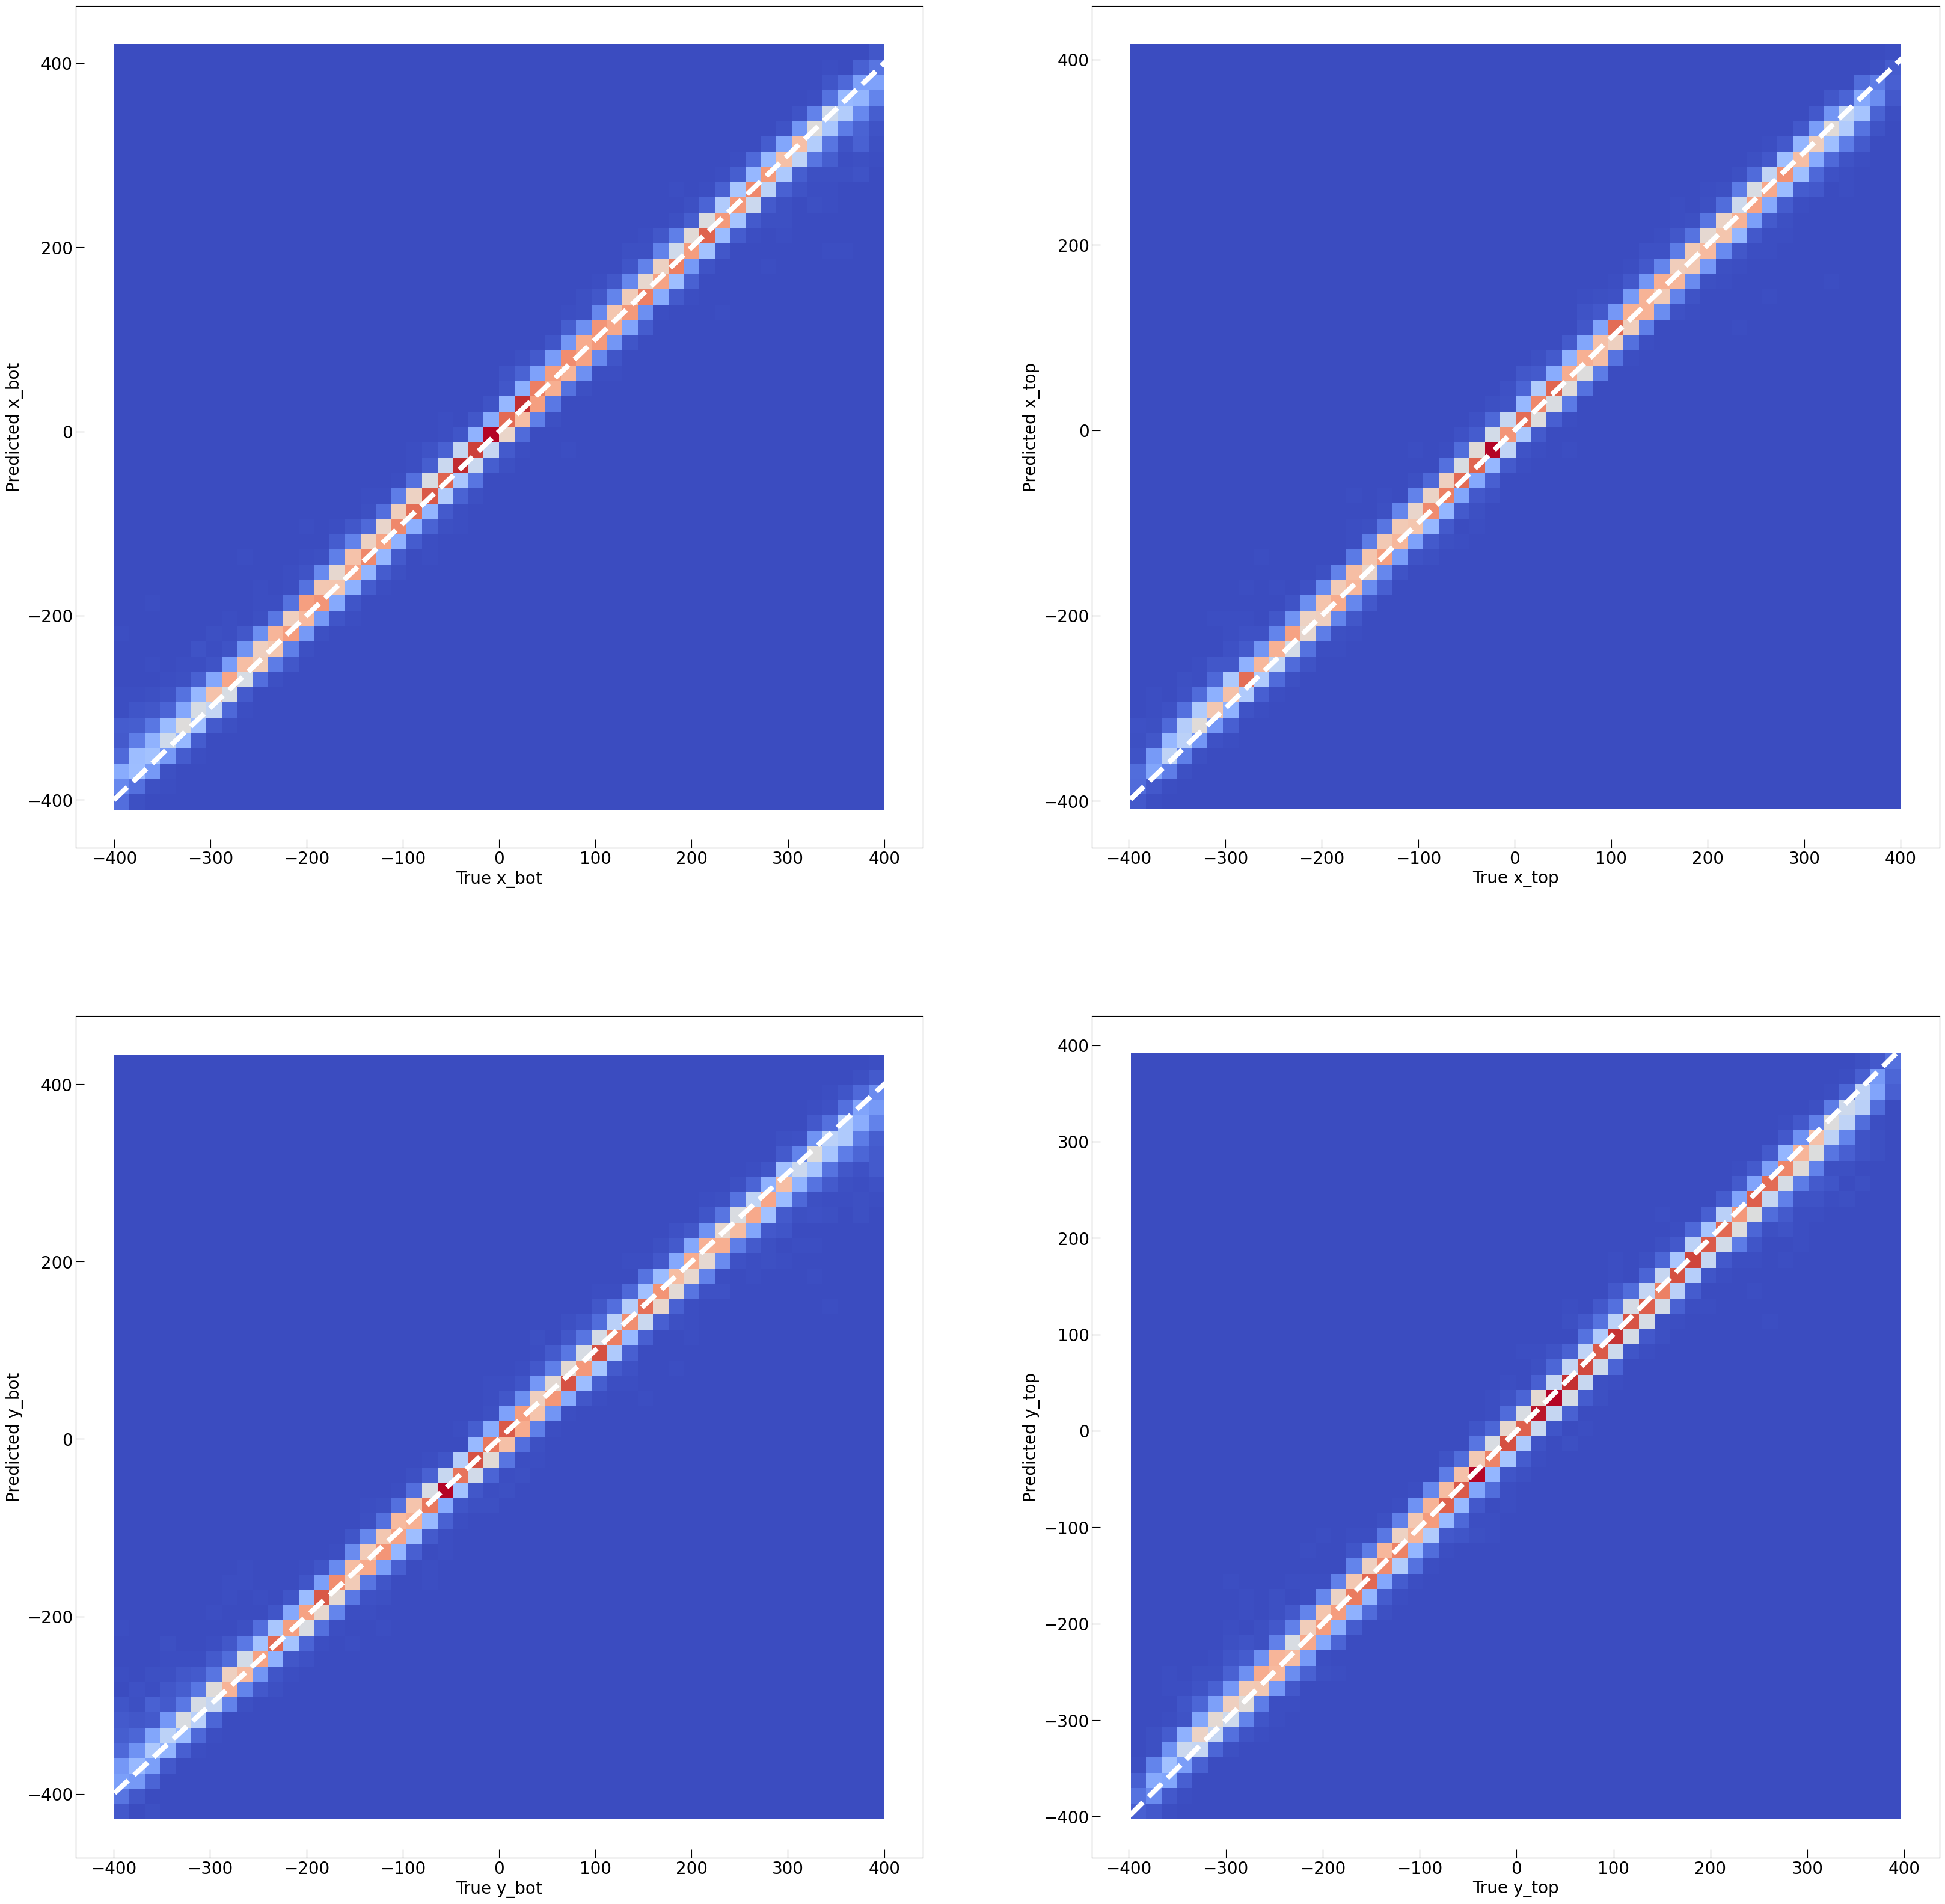

In [16]:
labels = ['x_bot', 'x_top', 'y_bot', 'y_top']

fig = plotting.plot_predictions(pred_coords, data_target_valid, var_label=labels)

plt.show()
# fig.savefig("eval_coords.pdf")
fig.clf()

### Plot the predicted - truth bias

/Users/devanshu/UniGe/dampe-cnn/plotting.py:19: RuntimeWarning: invalid value encountered in sqrt
  return (A / np.sqrt(sigma)) * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2))


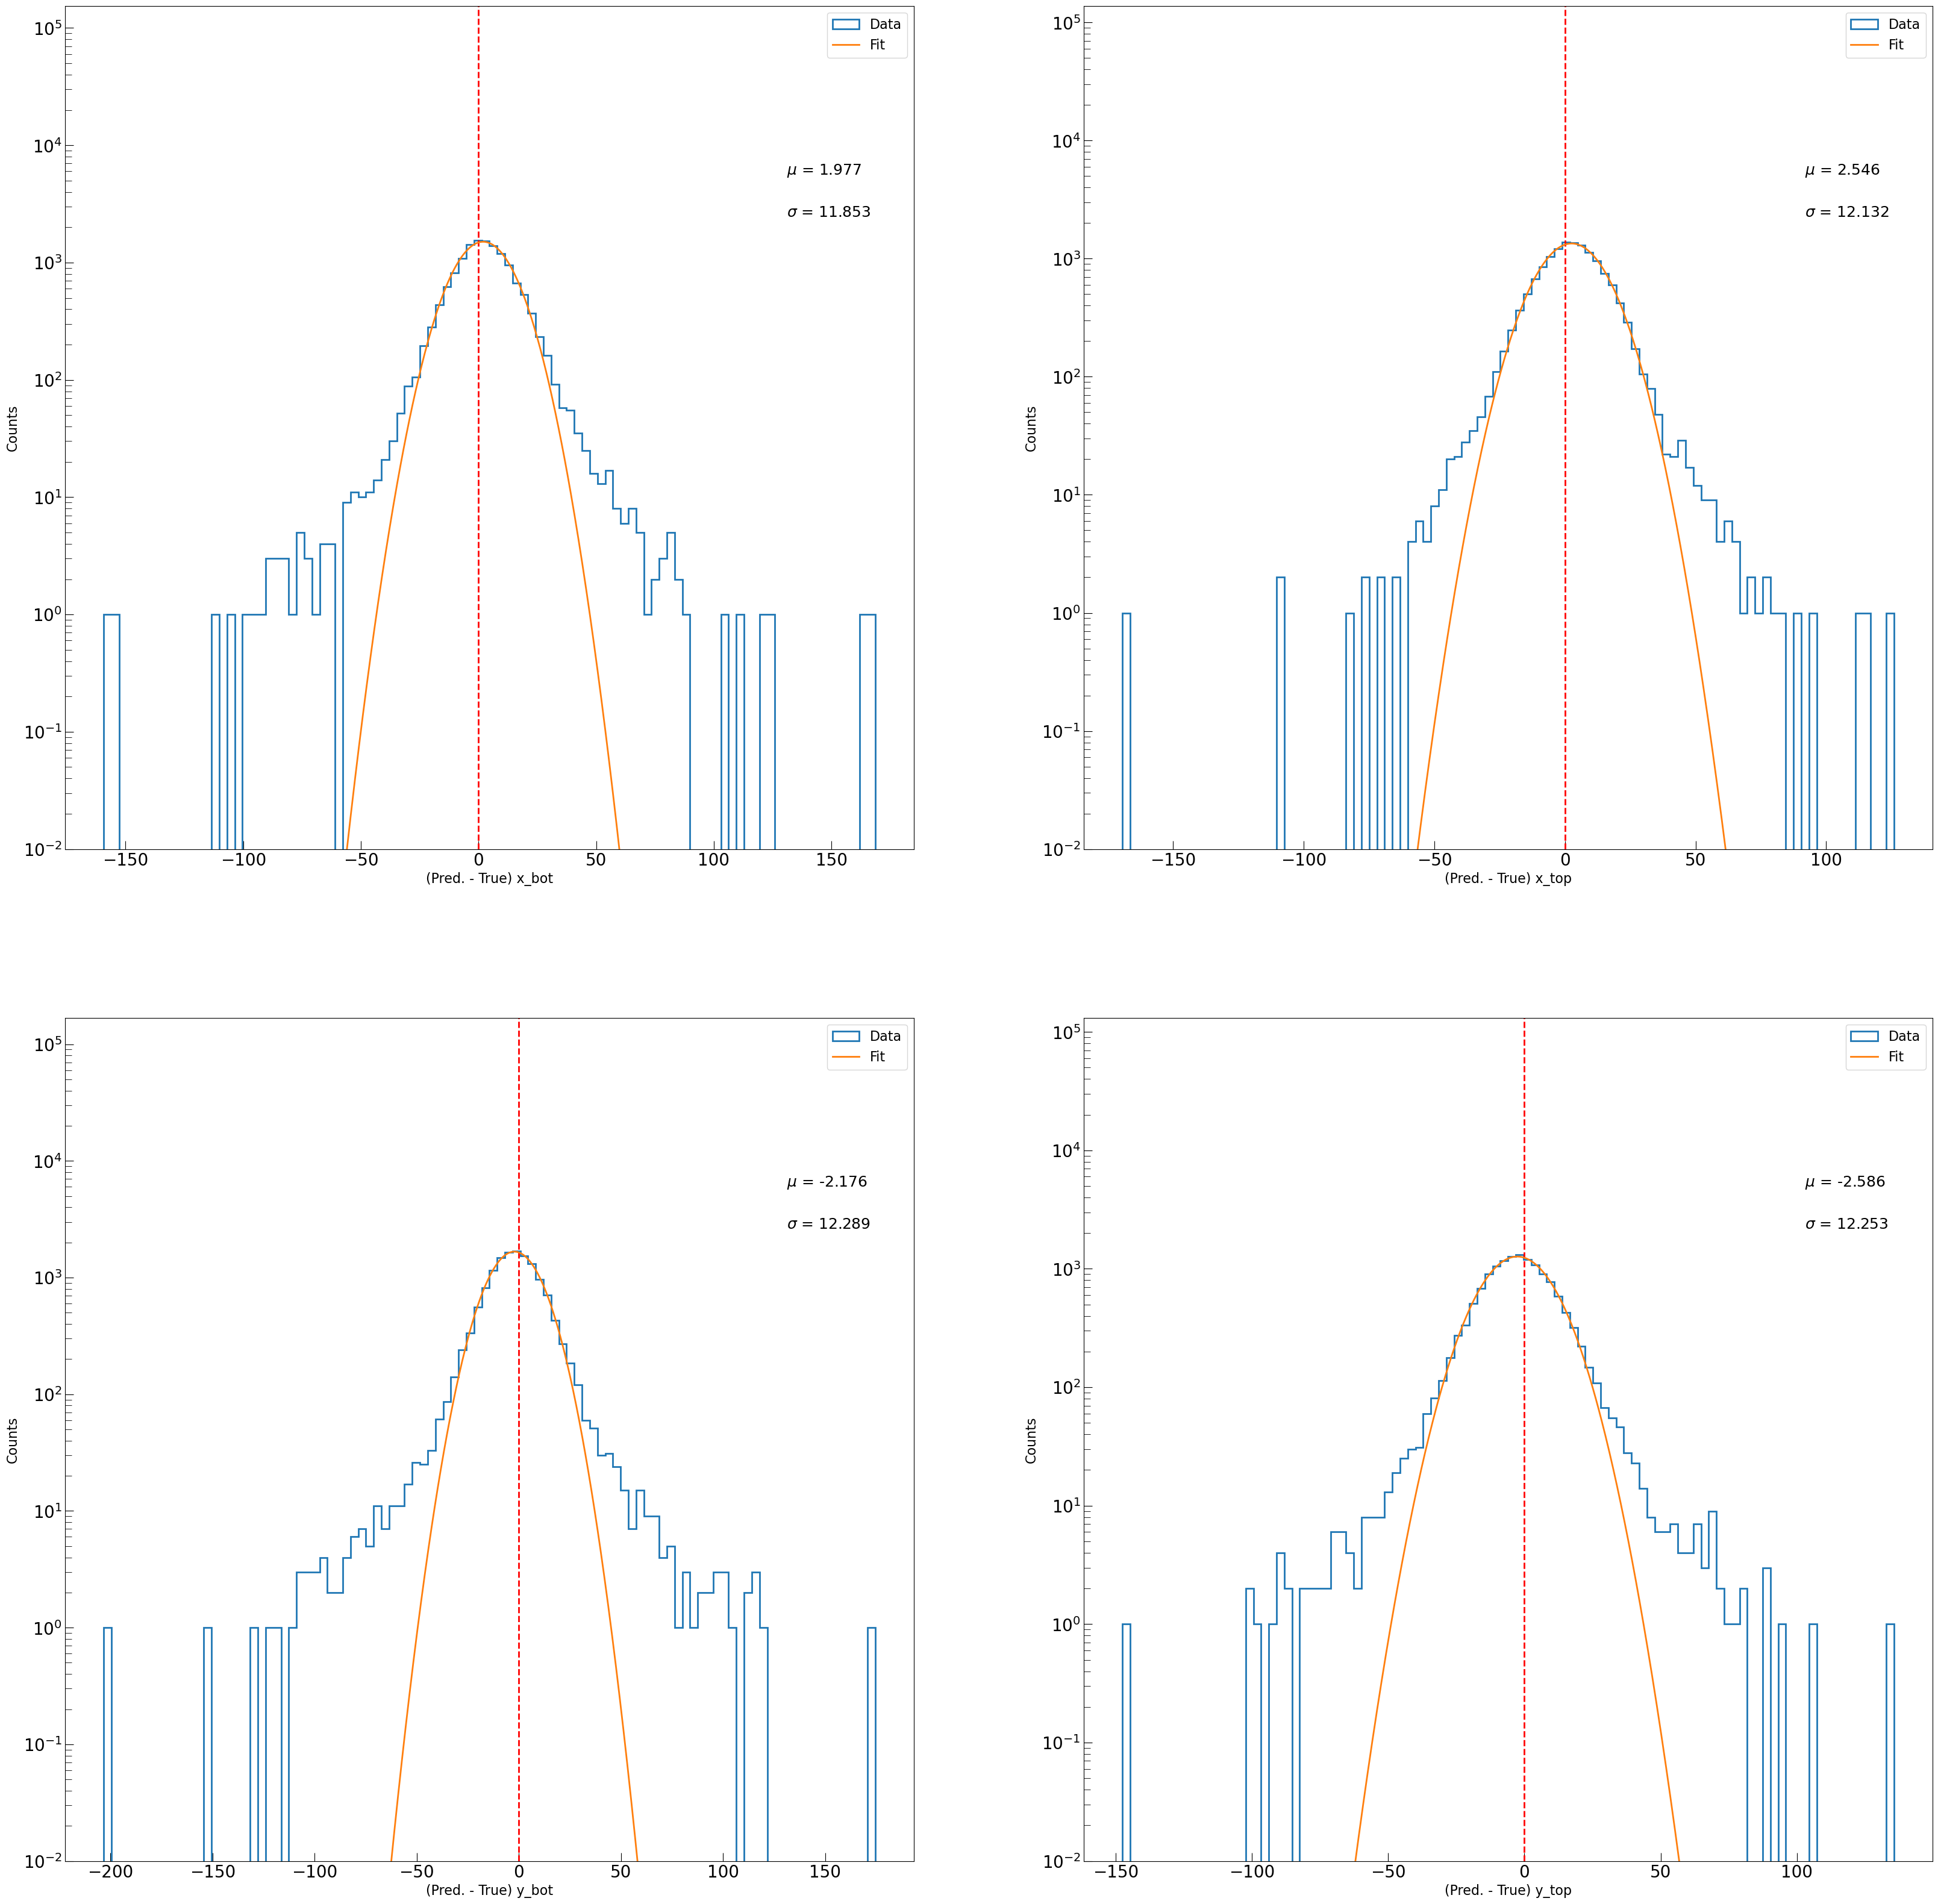

In [17]:
fig = plotting.plot_bias(pred_coords, data_target_valid, var_label=labels, fit_bias=True)

plt.show()
# fig.savefig("fit_bias.pdf")
fig.clf()

### Plot the bias vs. truth 

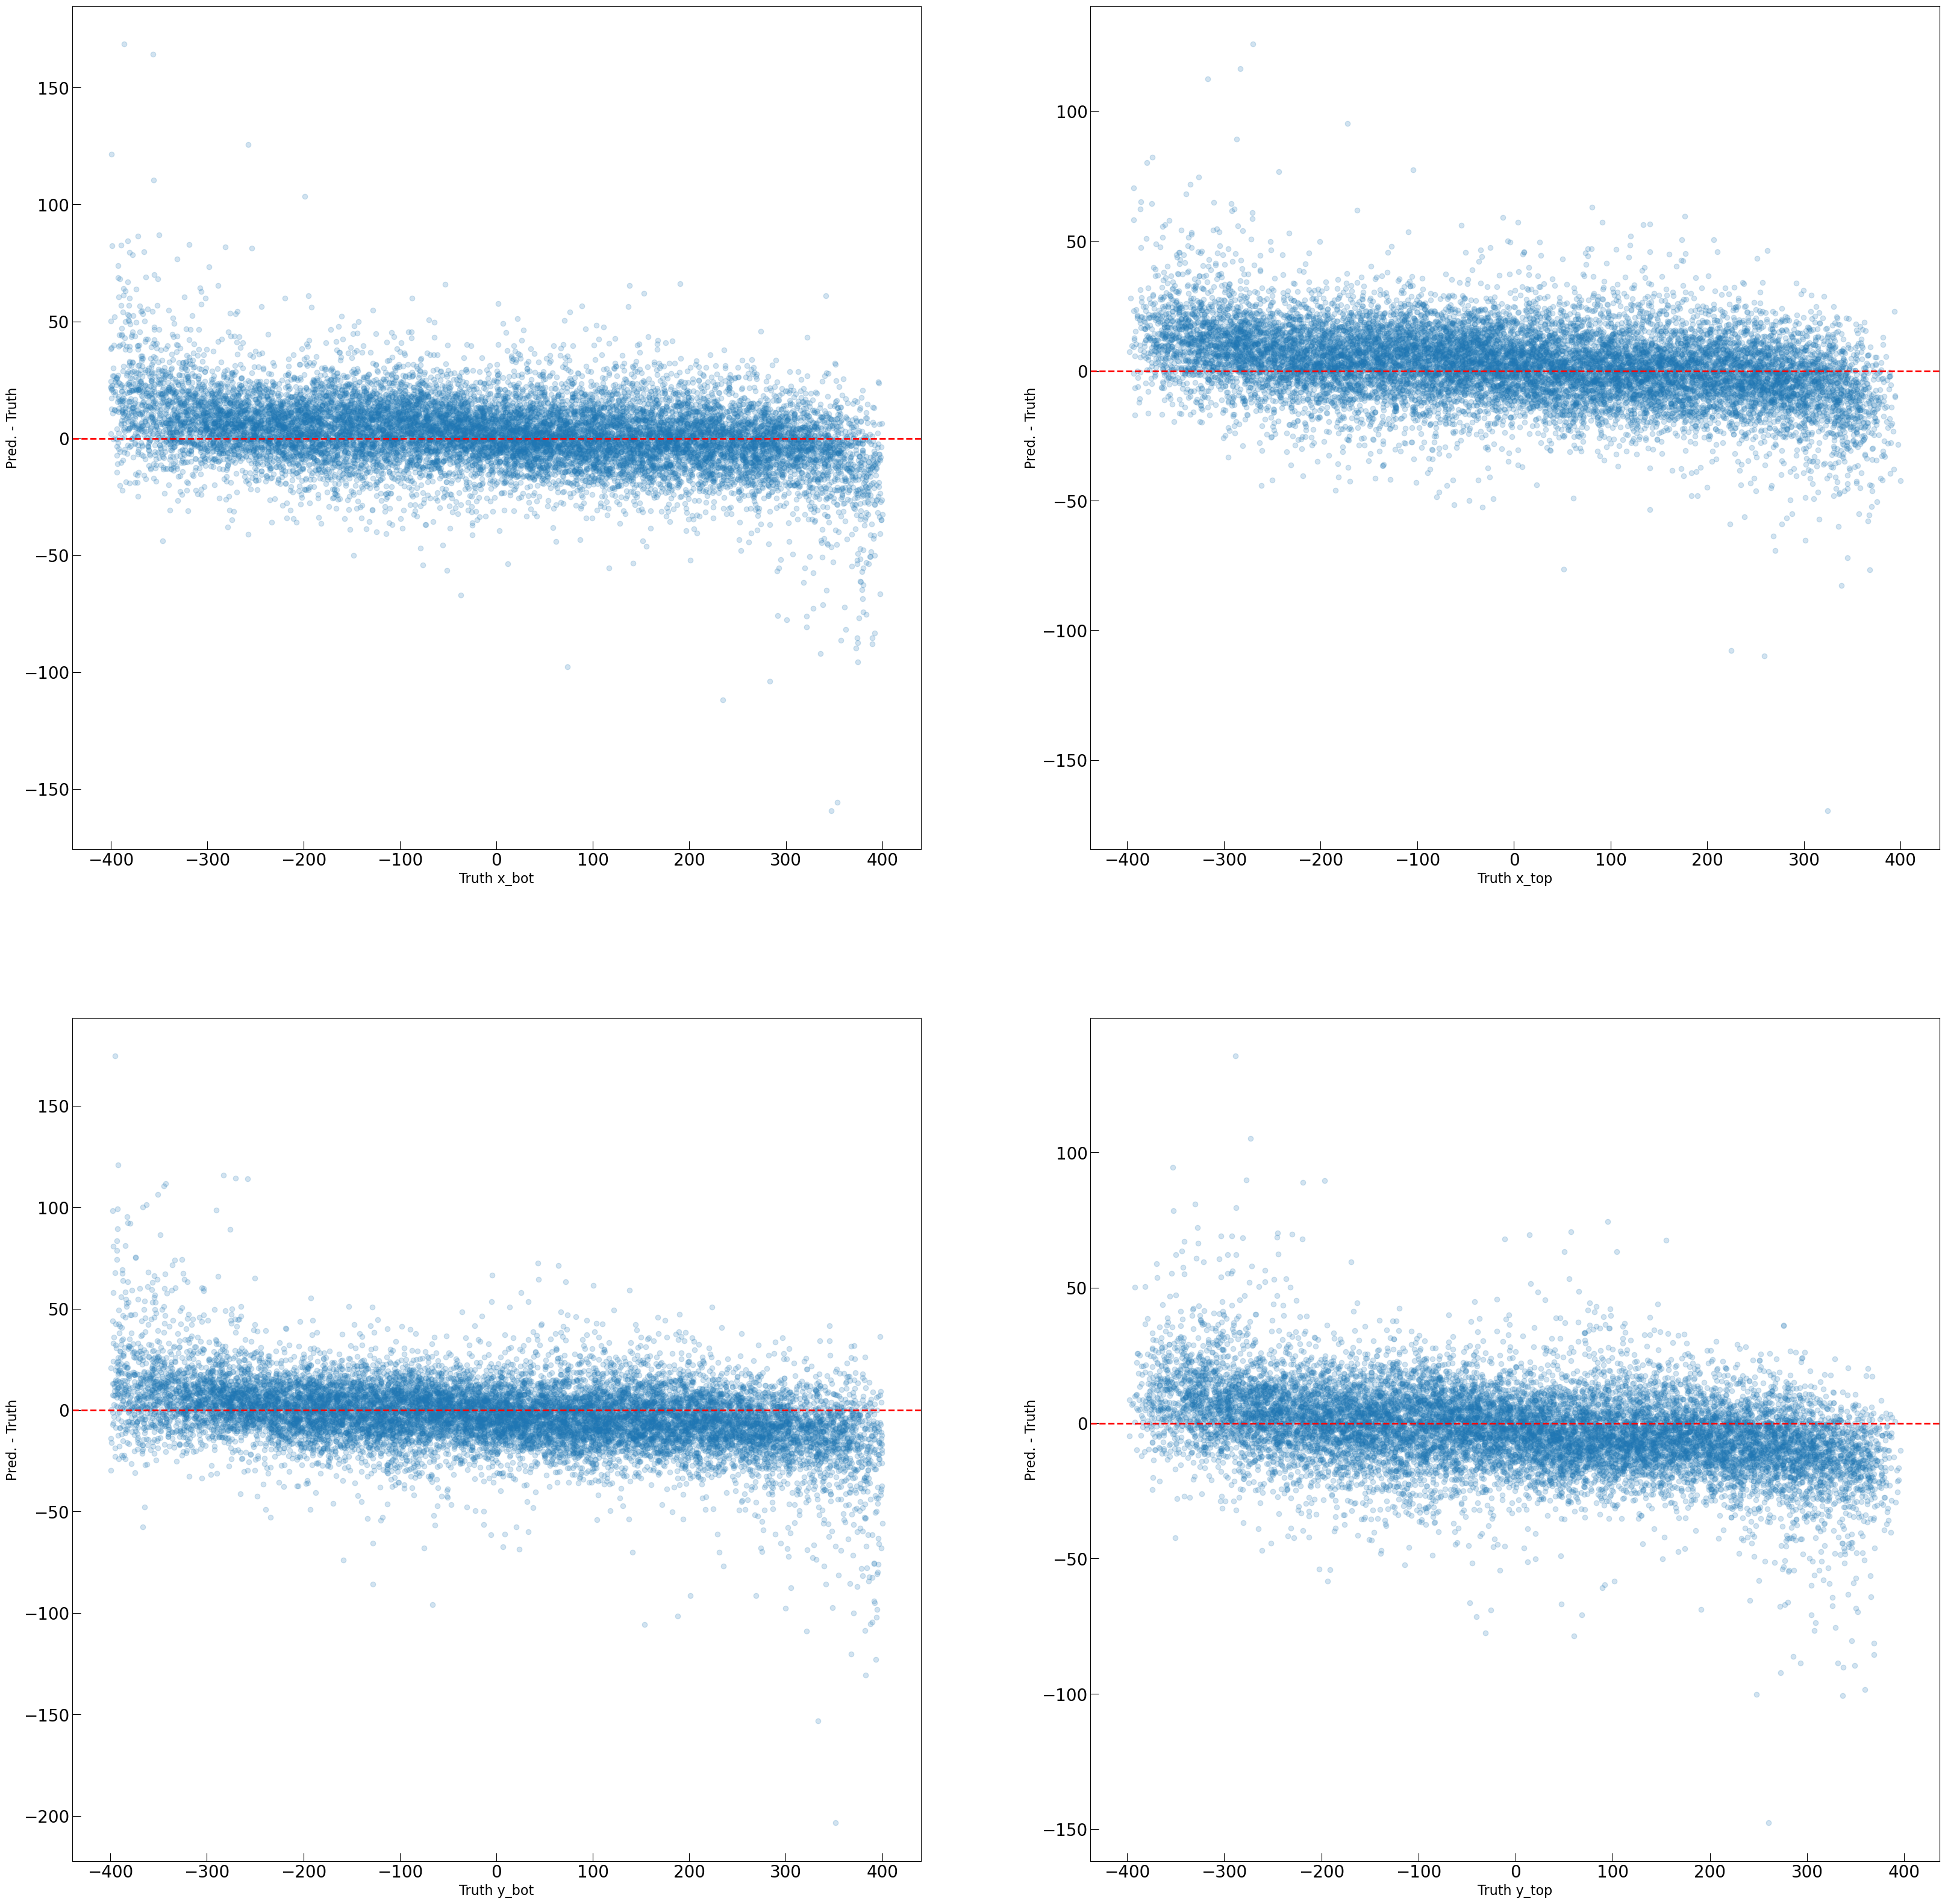

In [18]:
fig = plotting.plot_bias_truth(pred_coords, data_target_valid, var_label=labels)

plt.show()
# fig.savefig("bias_truth.pdf")
fig.clf()

### Plot the co-ordinates as a 2D histogram

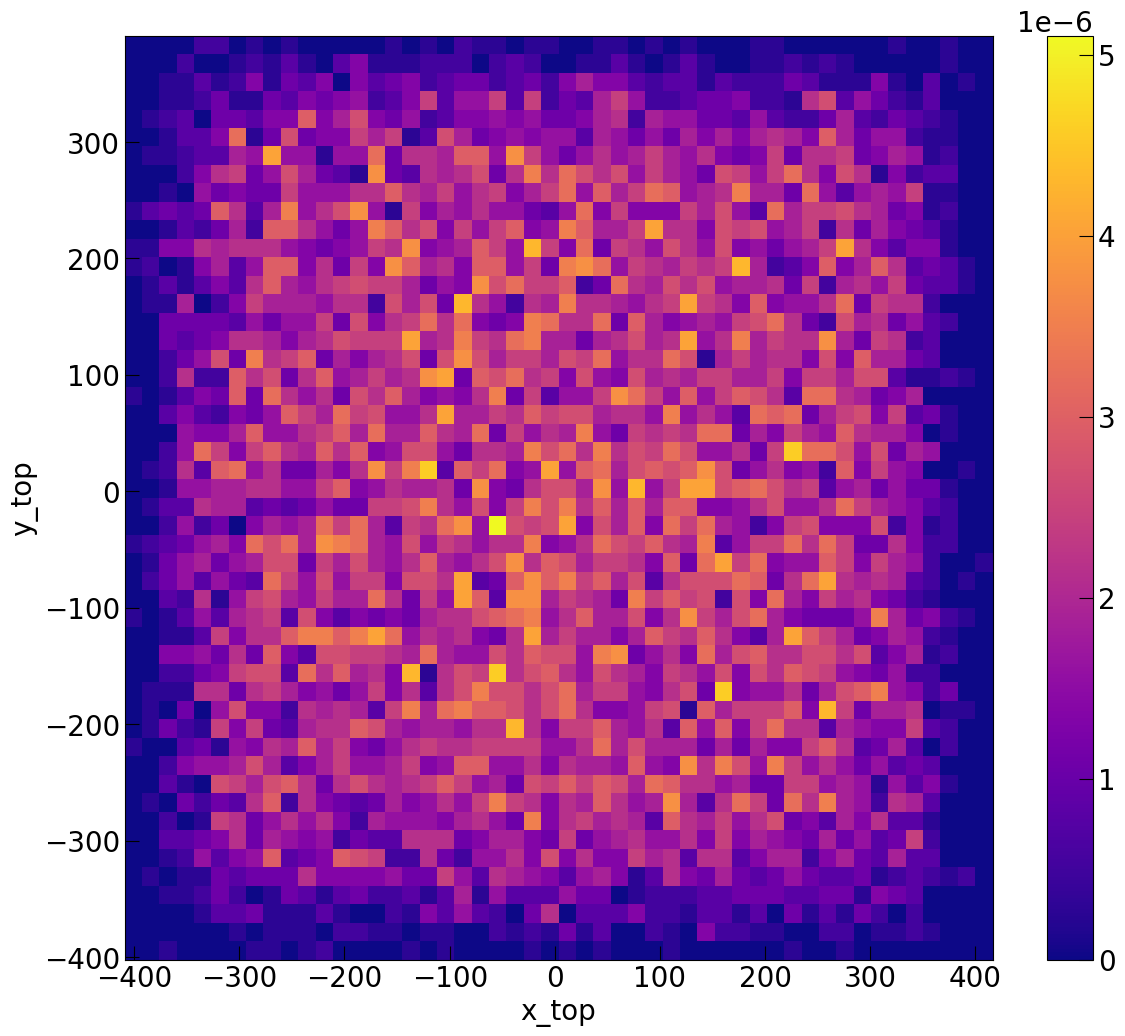

In [19]:
fig, ax = plt.subplots(figsize=(14,12))

h = ax.hist2d(pred_coords[:, 1], pred_coords[:, 3], 
              bins=50, cmap='plasma', 
              density=True, 
              cmin=0.0, cmax=1.0)
ax.set_xlabel('x_top')
ax.set_ylabel('y_top')
fig.colorbar(h[3], ax=ax)
# fig.savefig("pred_top_coords.pdf")
plt.show()

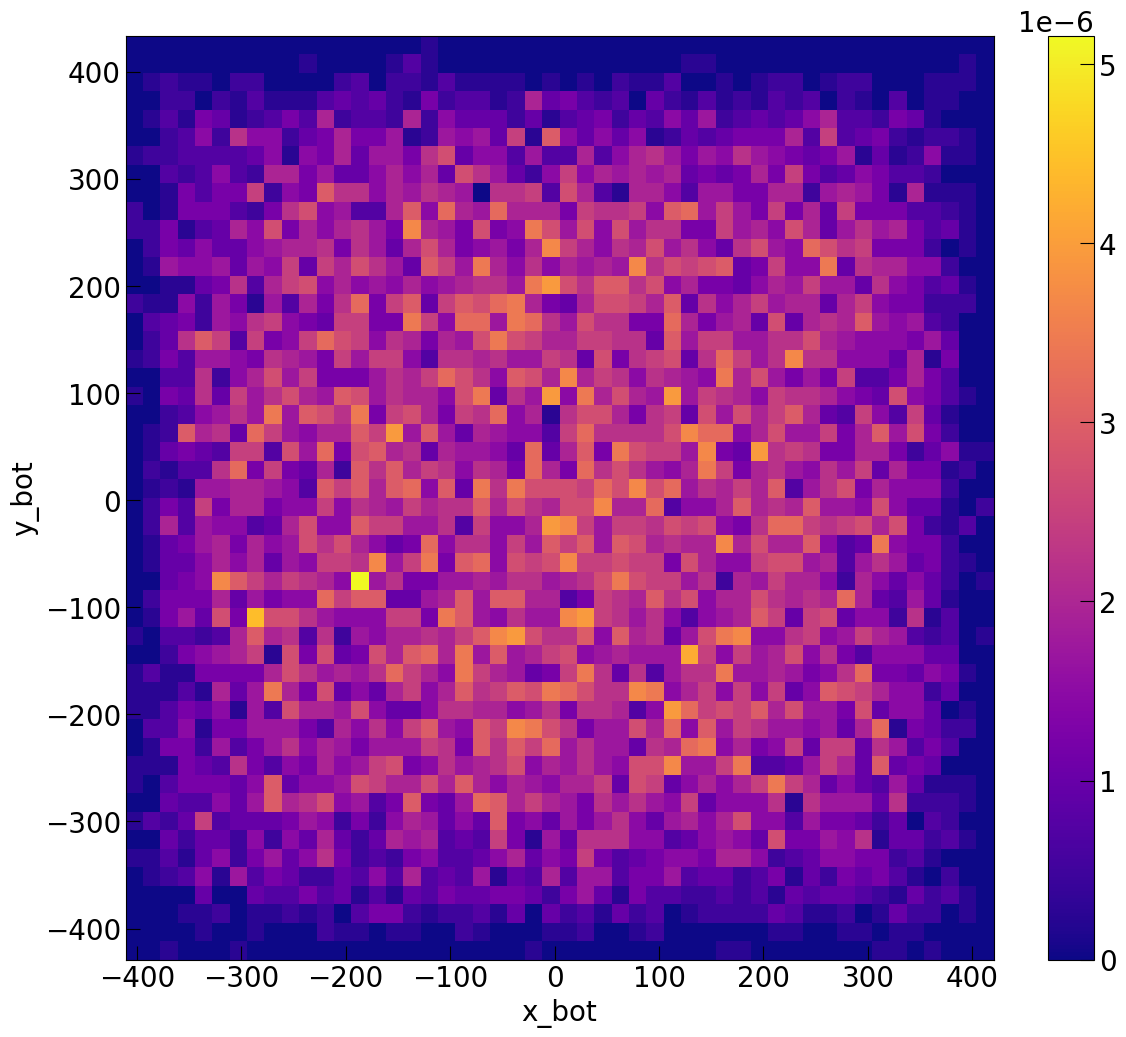

In [20]:
fig, ax = plt.subplots(figsize=(14,12))

h = ax.hist2d(pred_coords[:, 0], pred_coords[:, 2], 
              bins=50, cmap='plasma', 
              density=True,
              cmin=0.0, cmax=1.0)
ax.set_xlabel('x_bot')
ax.set_ylabel('y_bot')
fig.colorbar(h[3], ax=ax)
# fig.savefig("pred_bot_coords.pdf")
plt.show()